In [ ]:
#!pip uninstall likelihood
!pip install likelihood

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from likelihood import walkers
from likelihood import generate_series
from likelihood import regression
from likelihood import scale, rescale

In [ ]:
plt.rcParams['font.size'] = 24
plt.style.use('seaborn-poster')

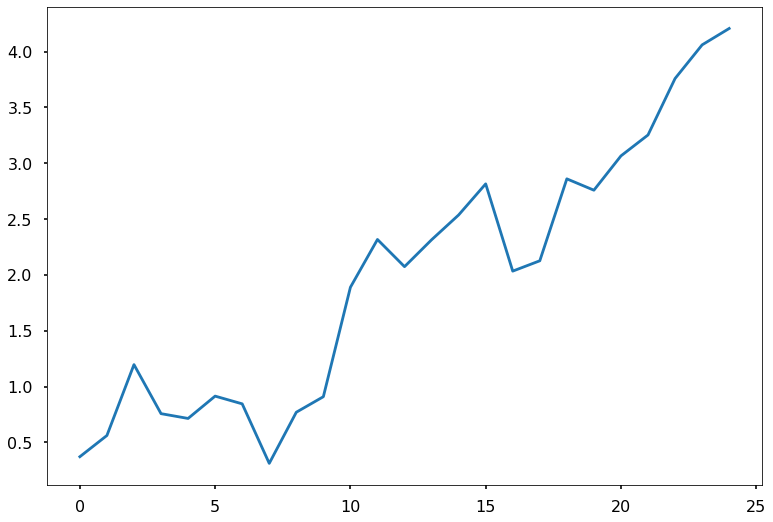

In [ ]:
a = generate_series(1, 25, incline=True)
y_serie = np.copy(a[0, :, 0])
plt.plot(range(len(y_serie)), y_serie)
plt.show()

In [ ]:
y_scale, values = rescale(a)

In [ ]:
y_new = y_scale[0, :, 0]

In [ ]:
model = regression(y_new, nwalkers = 1, noise = 0.2)
model.train()
y_pred = model.predict(15)

In [ ]:
y_pred.shape

(40,)

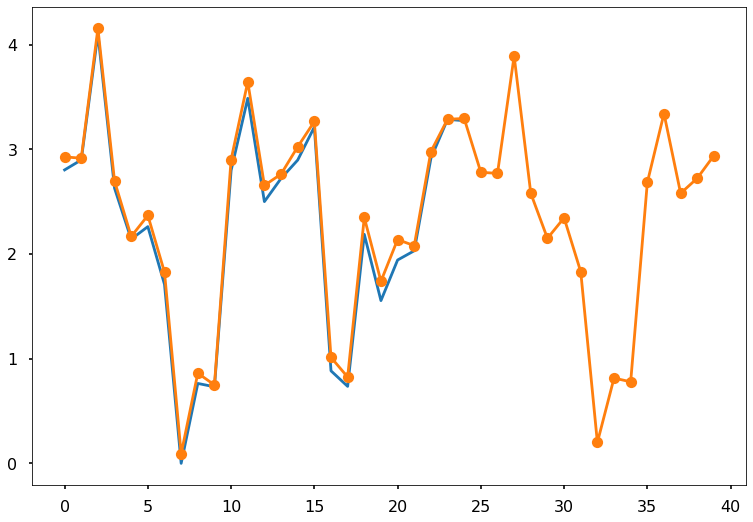

In [ ]:
plt.plot(range(len(y_new)), y_new, '-x')
plt.plot(range(len(y_pred[:])), y_pred[:], '-o')
plt.show()

In [ ]:
y_pred = y_pred[..., np.newaxis]
y_pred = y_pred.reshape((-1, 40, 1))

In [ ]:
y_pred.shape

(1, 40, 1)

In [ ]:
y_pred = scale(y_pred, values)
a = scale(a, values)

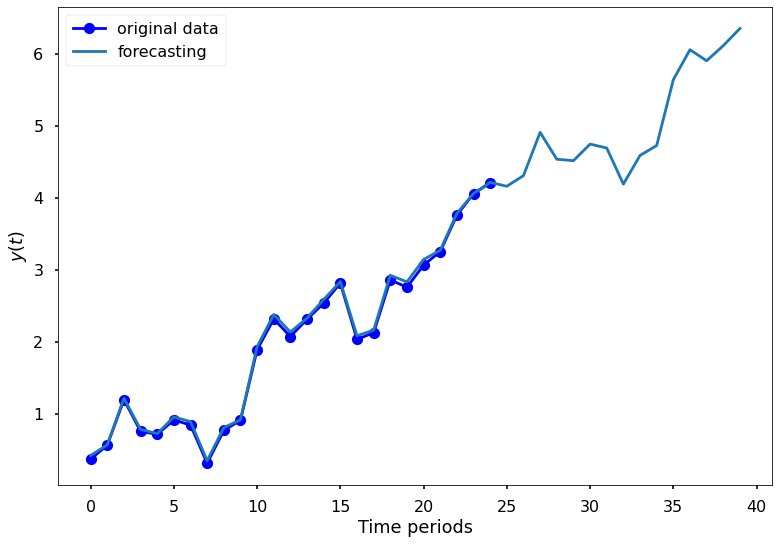

In [ ]:
plt.plot(range(len(a[0, :, 0])), a[0, :, 0], 'o-b', label = 'original data')
plt.plot(range(y_pred.shape[1]), y_pred[0, :, 0], label = 'forecasting')
plt.legend()
plt.xlabel('Time periods')
plt.ylabel('$y(t)$')
plt.show()